Importing Libraries


In [1]:
###Importing Modules we will use for data importing and pre-processingl###

import pandas as pd
import numpy as np
from sodapy import Socrata
import datetime as dt

In [2]:
###Importing Self made fuctions###

from self_def_functions import *

In [3]:
###Importing Modules we will use for data visualization###

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
###Importing Modules we will use for data processing and ML model### 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

In [5]:
###Importing Modules for The GUI###

from tkinter import *
import tkinter as tk

In [6]:
###Importing map distance modules###

from geopy.geocoders import Nominatim
from geopy import distance

Importing Data

In [7]:
###Get data from API and load into pandas dataframe###

Source = "data.cityofnewyork.us"
Key = "kxp8-n2sj"
limit = 2000000

taxi_df = load_data_from_API(Source,Key,limit)
taxi_df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01T00:28:15.000,2020-01-01T00:33:03.000,1,1.20,1,N,238,239,1,6,3,0.5,1.47,0,0.3,11.27,2.5
1,1,2020-01-01T00:35:39.000,2020-01-01T00:43:04.000,1,1.20,1,N,239,238,1,7,3,0.5,1.5,0,0.3,12.3,2.5
2,1,2020-01-01T00:47:41.000,2020-01-01T00:53:52.000,1,0.60,1,N,238,238,1,6,3,0.5,1,0,0.3,10.8,2.5
3,1,2020-01-01T00:55:23.000,2020-01-01T01:00:14.000,1,0.80,1,N,238,151,1,5.5,0.5,0.5,1.36,0,0.3,8.16,0
4,2,2020-01-01T00:01:58.000,2020-01-01T00:04:16.000,1,0.00,1,N,193,193,2,3.5,0.5,0.5,0,0,0.3,4.8,0


In [8]:
###Get taxizone lookup table from link##

link = "https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv"

taxi_zone_df = link_to_data(link)
taxi_zone_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [9]:
### Cleaning taxi_df data set
taxi_zone_df = taxi_zone_df.drop(columns=['service_zone'])
taxi_zone_df.isnull().sum()

LocationID    0
Borough       0
Zone          1
dtype: int64

In [10]:
taxi_zone_df= taxi_zone_df.dropna()

In [11]:
###Making Pickup taxi zone and Dropoff taxi zone tables###

pu_zone_df = taxi_zone_df.copy()
pu_zone_df.rename(columns = {'LocationID':'pulocationid','Borough':'puborough','Zone':'puzone'}, inplace = True)
do_zone_df = taxi_zone_df.copy()
do_zone_df.rename(columns = {'LocationID':'dolocationid','Borough':'doborough','Zone':'dozone'}, inplace = True)

In [12]:
###Shape of dataframe##

taxi_df.shape

(2000000, 18)

In [13]:
###Checking data types###

taxi_df.dtypes

vendorid                 object
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          object
trip_distance            object
ratecodeid               object
store_and_fwd_flag       object
pulocationid             object
dolocationid             object
payment_type             object
fare_amount              object
extra                    object
mta_tax                  object
tip_amount               object
tolls_amount             object
improvement_surcharge    object
total_amount             object
congestion_surcharge     object
dtype: object

In [14]:
###This command will supress warning raised when chained assignments are used###

pd.options.mode.chained_assignment = None

In [15]:
###Converting data types to make it more usefull###

#taxi_df['vendorid'] = pd.to_numeric(taxi_df['vendorid'])
#taxi_df['passenger_count'] = pd.to_numeric(taxi_df['passenger_count'])
#taxi_df['trip_distance'] = pd.to_numeric(taxi_df['trip_distance'])
#taxi_df['ratecodeid'] = pd.to_numeric(taxi_df['ratecodeid'])
#taxi_df['pulocationid'] = pd.to_numeric(taxi_df['pulocationid'])
#taxi_df['dolocationid'] = pd.to_numeric(taxi_df['dolocationid'])
#taxi_df['payment_type'] = pd.to_numeric(taxi_df['payment_type'])
#taxi_df['fare_amount'] = pd.to_numeric(taxi_df['fare_amount'])
#taxi_df['extra'] = pd.to_numeric(taxi_df['extra'])
#taxi_df['mta_tax'] = pd.to_numeric(taxi_df['mta_tax'])
#taxi_df['tip_amount'] = pd.to_numeric(taxi_df['tip_amount'])
#taxi_df['tolls_amount'] = pd.to_numeric(taxi_df['tolls_amount'])
#taxi_df['improvement_surcharge'] = pd.to_numeric(taxi_df['improvement_surcharge'])
#taxi_df['total_amount'] = pd.to_numeric(taxi_df['total_amount'])
#taxi_df['congestion_surcharge'] = pd.to_numeric(taxi_df['congestion_surcharge'])
#taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
#taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
#taxi_df['store_and_fwd_flag'] = taxi_df['store_and_fwd_flag'].astype('category')

In [16]:
###Converting data types to make it more usefull###

taxi_df = make_numeric(taxi_df,'vendorid')
taxi_df = make_numeric(taxi_df,'passenger_count')
taxi_df = make_numeric(taxi_df,'trip_distance')
taxi_df = make_numeric(taxi_df,'ratecodeid')
taxi_df = make_numeric(taxi_df,'pulocationid')
taxi_df = make_numeric(taxi_df,'dolocationid')
taxi_df = make_numeric(taxi_df,'payment_type')
taxi_df = make_numeric(taxi_df,'fare_amount')
taxi_df = make_numeric(taxi_df,'extra')
taxi_df = make_numeric(taxi_df,'mta_tax')
taxi_df = make_numeric(taxi_df,'tip_amount')
taxi_df = make_numeric(taxi_df,'tolls_amount')
taxi_df = make_numeric(taxi_df,'improvement_surcharge')
taxi_df = make_numeric(taxi_df,'total_amount')
taxi_df = make_numeric(taxi_df,'congestion_surcharge')
taxi_df = convert_to_datetime(taxi_df,'tpep_pickup_datetime')
taxi_df = convert_to_datetime(taxi_df,'tpep_dropoff_datetime')

taxi_df.dtypes

vendorid                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int64
dolocationid                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [17]:
###Merging Pickup zone and dropoff zone dataframes with main dataframe###

taxi_df = pd.merge(taxi_df, pu_zone_df, on='pulocationid')
taxi_df = pd.merge(taxi_df, do_zone_df, on='dolocationid')
taxi_df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,puborough,puzone,doborough,dozone
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,...,0.5,1.47,0.0,0.3,11.27,2.5,Manhattan,Upper West Side North,Manhattan,Upper West Side South
1,2.0,2020-01-01 00:24:22,2020-01-01 00:25:54,1.0,0.56,1.0,N,238,239,1.0,...,0.5,1.70,0.0,0.3,9.00,2.5,Manhattan,Upper West Side North,Manhattan,Upper West Side South
2,2.0,2020-01-01 00:46:46,2020-01-01 00:49:17,1.0,0.62,1.0,N,238,239,1.0,...,0.5,1.00,0.0,0.3,9.30,2.5,Manhattan,Upper West Side North,Manhattan,Upper West Side South
3,1.0,2020-01-01 00:17:53,2020-01-01 00:22:47,1.0,0.80,1.0,Y,238,239,1.0,...,0.5,1.85,0.0,0.3,11.15,2.5,Manhattan,Upper West Side North,Manhattan,Upper West Side South
4,2.0,2020-01-01 00:49:45,2020-01-01 00:54:12,1.0,0.86,1.0,N,238,239,1.0,...,0.5,1.86,0.0,0.3,11.16,2.5,Manhattan,Upper West Side North,Manhattan,Upper West Side South


In [18]:
###Checking null values###

taxi_df.isnull().sum()

vendorid                 4125
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4125
trip_distance               0
ratecodeid               4125
store_and_fwd_flag       4125
pulocationid                0
dolocationid                0
payment_type             4125
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
puborough                   0
puzone                      0
doborough                   0
dozone                      0
dtype: int64

In [19]:
###Dropping rows with null values###

taxi_df = taxi_df.dropna()

In [20]:
###Checking Shape after droping null value columns###

taxi_df.shape

(1990806, 22)

In [21]:
###Checking Data types after data cleaning###

taxi_df.dtypes

vendorid                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int64
dolocationid                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
puborough                        object
puzone                           object
doborough                        object
dozone                           object
dtype: object

In [22]:
###Filtering the data with passengers more than zero and less than nine###

taxi_df = taxi_df[taxi_df['passenger_count']>0]
taxi_df = taxi_df[taxi_df['passenger_count']<7]

In [23]:
###Filtering the data with trip distance more than zero and less than 100 miles###

taxi_df = taxi_df[taxi_df['trip_distance']>0]
taxi_df = taxi_df[taxi_df['trip_distance']<100]

In [24]:
###Filtering data with Total fare more than zero###

taxi_df = taxi_df[taxi_df['total_amount']>0]

In [25]:
###Creating new columns named weekday number and pickup hour###

taxi_df['weekday_num'] = taxi_df.tpep_pickup_datetime.dt.weekday
taxi_df['pickup_hour'] = taxi_df.tpep_pickup_datetime.dt.hour

In [26]:
## Adding new column called duration (difference between dropoff time and pick up time)
taxi_df["trip_duration"] = taxi_df['tpep_dropoff_datetime'] - taxi_df['tpep_pickup_datetime']
taxi_df["trip_duration"] = taxi_df["trip_duration"].astype(str)
taxi_df["trip_duration"] = taxi_df["trip_duration"].str.slice(9)
taxi_df["trip_duration"] = taxi_df["trip_duration"].str.slice(1)
taxi_df["trip_duration"] = taxi_df["trip_duration"].str.slice(-2)
taxi_df = make_numeric(taxi_df,'trip_duration')

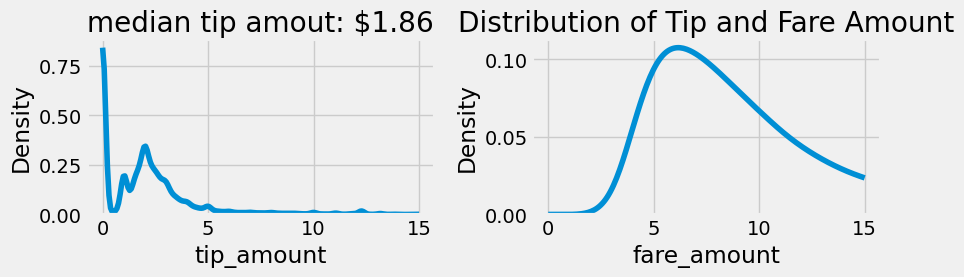

In [27]:
###Comparing Distribution of tip amount and Fare###

matplotlib.style.use('fivethirtyeight')

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
clip = [0, 15]

sns.kdeplot(data=taxi_df, x="tip_amount", ax=axs[0], clip=clip)
axs[0].set_title(f"median tip amout: ${taxi_df['tip_amount'].median():.2f}")

sns.kdeplot(data= taxi_df, x="fare_amount", ax=axs[1], clip=clip)
axs[1].set_title(f"median fare amout: ${taxi_df['fare_amount'].median():.2f}")
plt.title('Distribution of Tip and Fare Amount')
fig.tight_layout()

C:\Users\aayus\AppData\Local\Temp\ipykernel_1000\945868845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  passenger_graph = sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi_df, palette = 'gist_rainbow', linewidth = 2.3)
C:\Users\aayus\AppData\Local\Temp\ipykernel_1000\945868845.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  passenger_graph.set_yticklabels(labels = [-10, '0  ', '2000  ', '4000  ', '6000  ', '8000  ', '10000  ','12000 s'])


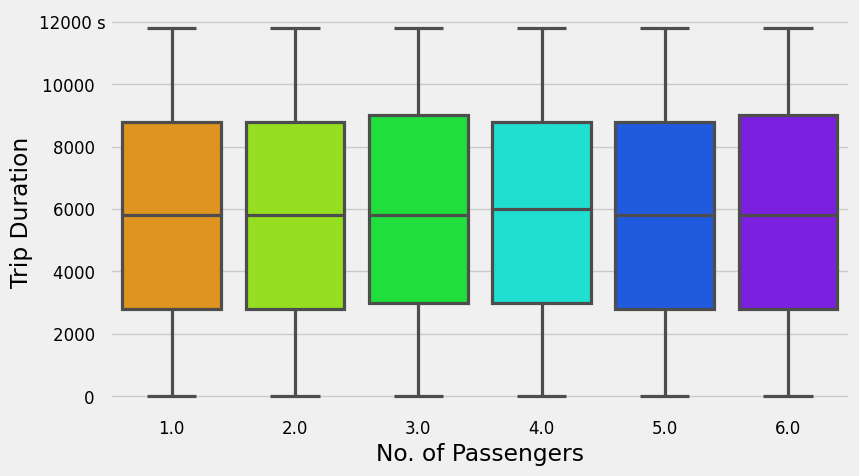

passenger_count,1.0,2.0,3.0,4.0,5.0,6.0
count,1.383937e+06,306010.000000,83660.000000,43496.000000,71152.000000,42294.000000
mean,2.943272e+01,29.449587,29.529166,29.510760,29.334875,29.480872
std,1.731307e+01,17.316156,17.313900,17.289147,17.351445,17.377143
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+01,14.000000,15.000000,15.000000,14.000000,14.000000
50%,2.900000e+01,29.000000,29.000000,30.000000,29.000000,29.000000
75%,4.400000e+01,44.000000,45.000000,44.000000,44.000000,45.000000
max,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000


In [28]:
### Comparing Trip duration With number of Passenger###
plt.figure(figsize=(8.5,5))
passenger_graph = sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi_df, palette = 'gist_rainbow', linewidth = 2.3)

passenger_graph.tick_params(axis = 'both', which = 'major', labelsize = 12)

passenger_graph.set_yticklabels(labels = [-10, '0  ', '2000  ', '4000  ', '6000  ', '8000  ', '10000  ','12000 s'])
plt.ylabel('Trip Duration')
plt.xlabel('No. of Passengers')
plt.show()

taxi_df.groupby('passenger_count')['trip_duration'].describe().transpose()

Text(0.5, 1.0, 'Trip Duration Throughout The Day')

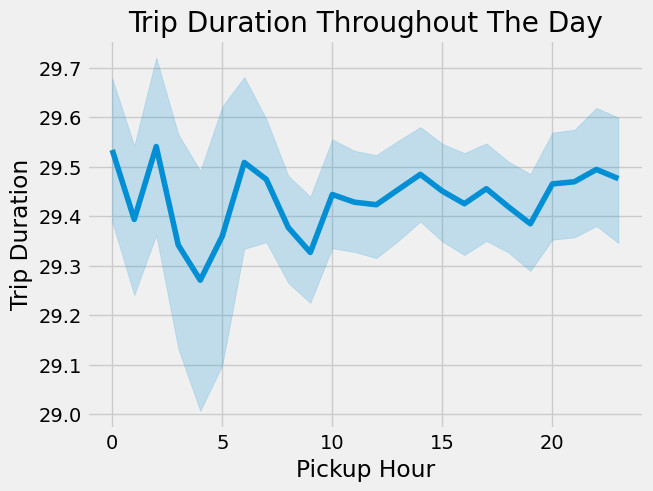

In [29]:
#Pickup hour vs trip duration
sns.lineplot(x='pickup_hour',y='trip_duration',data=taxi_df)
plt.ylabel('Trip Duration')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration Throughout The Day')

Text(0.5, 1.0, 'Trip Distance Throughout The Day')

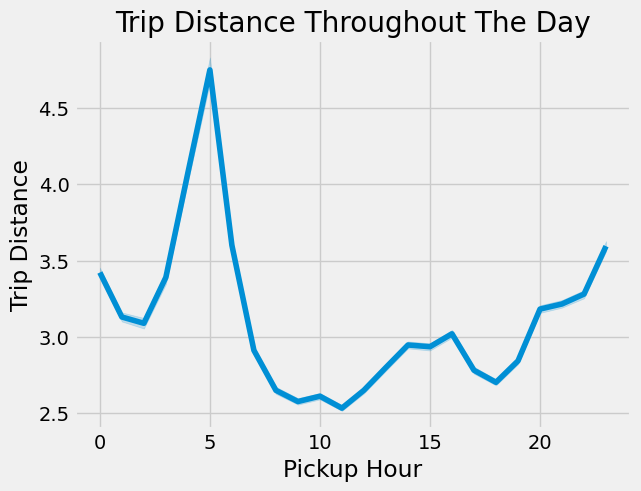

In [30]:
#Distance per hour of day
sns.lineplot(x='pickup_hour',y='trip_distance',data=taxi_df)
plt.ylabel('Trip Distance')
plt.xlabel('Pickup Hour')
plt.title('Trip Distance Throughout The Day')

Text(0.5, 1.0, 'Trip Distance vs Trip Duration')

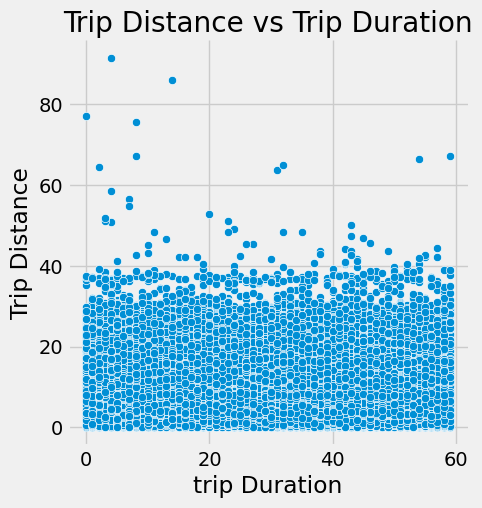

In [31]:
#Trip Duration and Distance
sns.relplot(y=taxi_df.trip_distance,x='trip_duration',data=taxi_df)
plt.ylabel('Trip Distance')
plt.xlabel('trip Duration')
plt.title('Trip Distance vs Trip Duration')

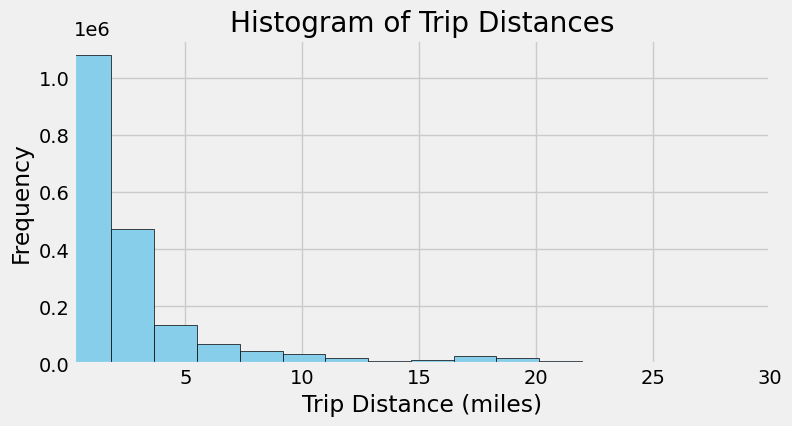

In [32]:
# Ploting a histogram of trip distances
plt.figure(figsize=(8, 4))
plt.hist(taxi_df['trip_distance'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0.25,30)
plt.show()

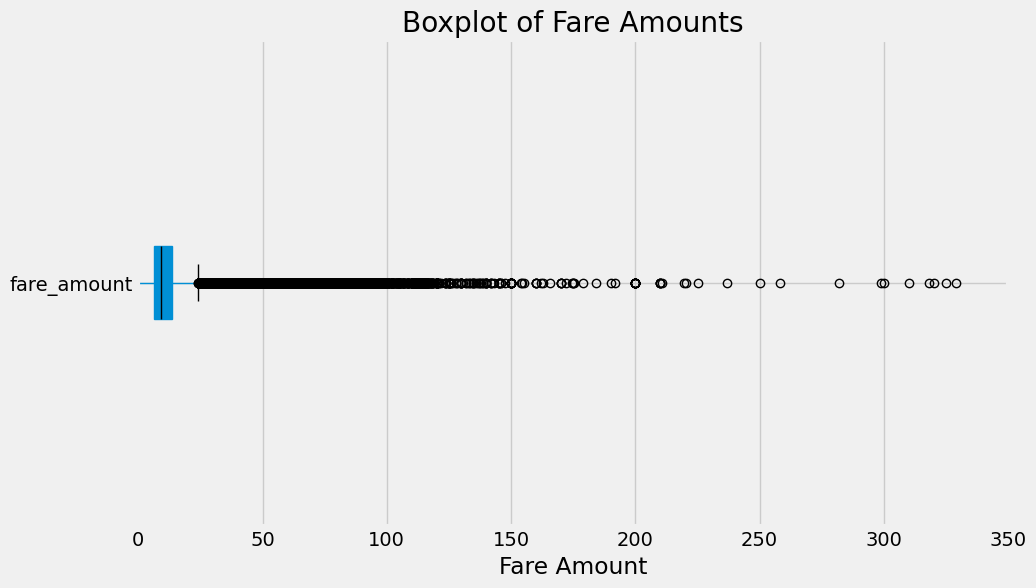

In [33]:
# Plot a boxplot of fare amounts
plt.figure(figsize=(10, 6))
taxi_df.boxplot(column='fare_amount', vert=False, patch_artist=True, medianprops={'color':'black'})
plt.title('Boxplot of Fare Amounts')
plt.xlabel('Fare Amount')
plt.xlim(0,350)
plt.show()

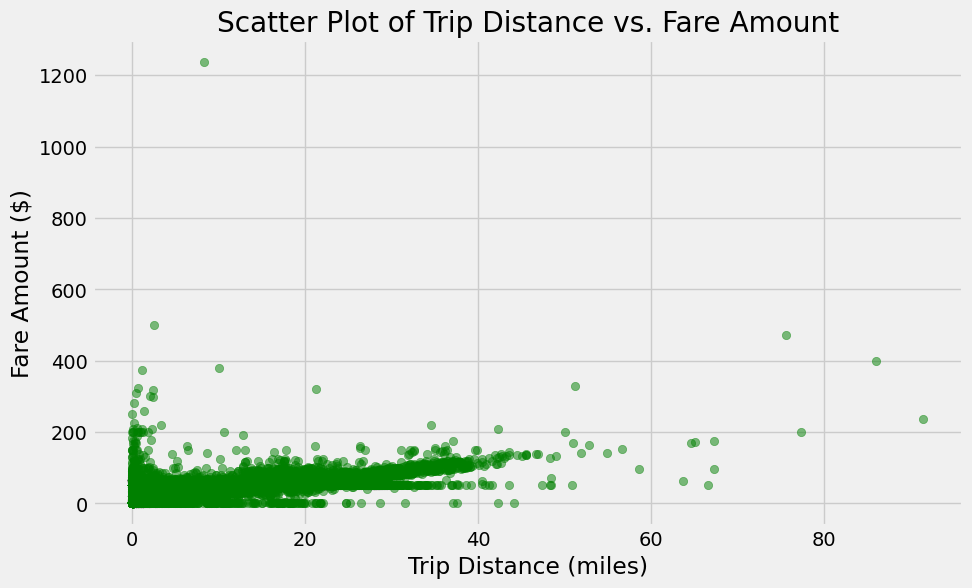

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(taxi_df['trip_distance'], taxi_df['fare_amount'], alpha=0.5, color='green')
plt.title('Scatter Plot of Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

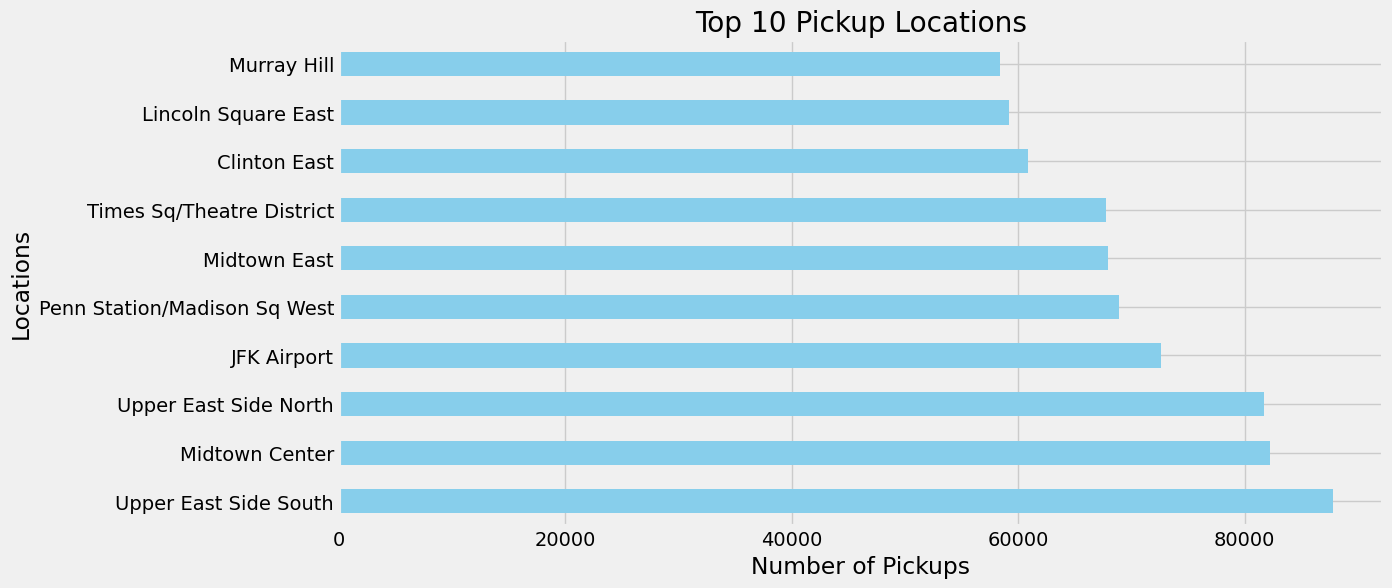

In [35]:
# Ploting a bar plot of the top 10 pickup locations
top_pickup_locations = taxi_df['puzone'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_pickup_locations.plot(kind='barh',color='skyblue')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Number of Pickups')
plt.ylabel('Locations')
plt.show()

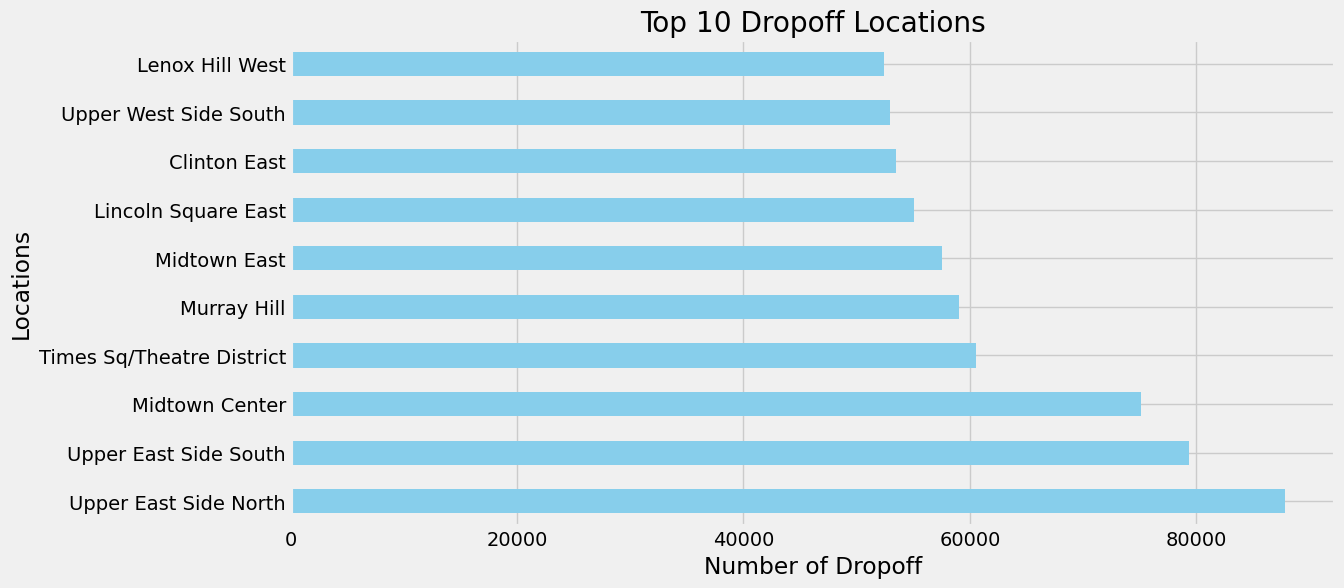

In [36]:
# Ploting a bar plot of the top 10 pickup locations
top_pickup_locations = taxi_df['dozone'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_pickup_locations.plot(kind='barh', color='skyblue')
plt.title('Top 10 Dropoff Locations')
plt.xlabel('Number of Dropoff')
plt.ylabel('Locations')
plt.show()

In [37]:
# Droping columns which are not necessary for The ML model to predict fare

ML_fair_df=taxi_df.drop(['vendorid','passenger_count','tpep_pickup_datetime','tpep_dropoff_datetime',
                 'store_and_fwd_flag','ratecodeid','payment_type','fare_amount','extra','mta_tax',
                 'tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','trip_duration','puborough','puzone','doborough','dozone'], axis=1)

In [38]:
ML_fair_df.head()

,trip_distance,pulocationid,dolocationid,total_amount,weekday_num,pickup_hour
0,1.20,238,239,11.27,2,0
1,0.56,238,239,9.00,2,0
2,0.62,238,239,9.30,2,0
3,0.80,238,239,11.15,2,0
4,0.86,238,239,11.16,2,0


In [39]:
# Looking at the data types

ML_fair_df.dtypes

trip_distance    float64
pulocationid       int64
dolocationid       int64
total_amount     float64
weekday_num        int32
pickup_hour        int32
dtype: object

In [40]:
#Spliting the data into test and train
# We are going to use trip distance, PULocationID, DOLocationID, Weekday number and Pickup Hour as the feature elements to predict Taxi fares
# passenger_count,PULocationID,DOLocationID,weekday_num,pickup_hour
x = ML_fair_df.iloc[:, [0,1,2,4,5]].values
y = ML_fair_df.iloc[:,3].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7294)

In [41]:
# Running The Linear regression model

start_time = time.time()
lm_regression = LinearRegression()
lm_regression = lm_regression.fit(x_train, y_train)
end_time = time.time()
lm_time = (end_time - start_time)
print(f"Time taken to train linear regression model : {lm_time} seconds")

Time taken to train linear regression model : 0.25560474395751953 seconds


In [42]:
lm_regression_trips = lm_regression.predict(x_test)
# Generating prediction for Linear Regression model

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lm_regression_trips.flatten()})
predictions.head(10)

,Actual,Predicted
0,12.98,15.106025
1,8.80,10.269098
2,19.56,18.802354
3,20.16,16.763990
4,15.36,12.257410
5,11.16,12.410639
6,78.80,98.389595
7,20.38,15.969411
8,20.80,22.575166
9,10.80,13.454652


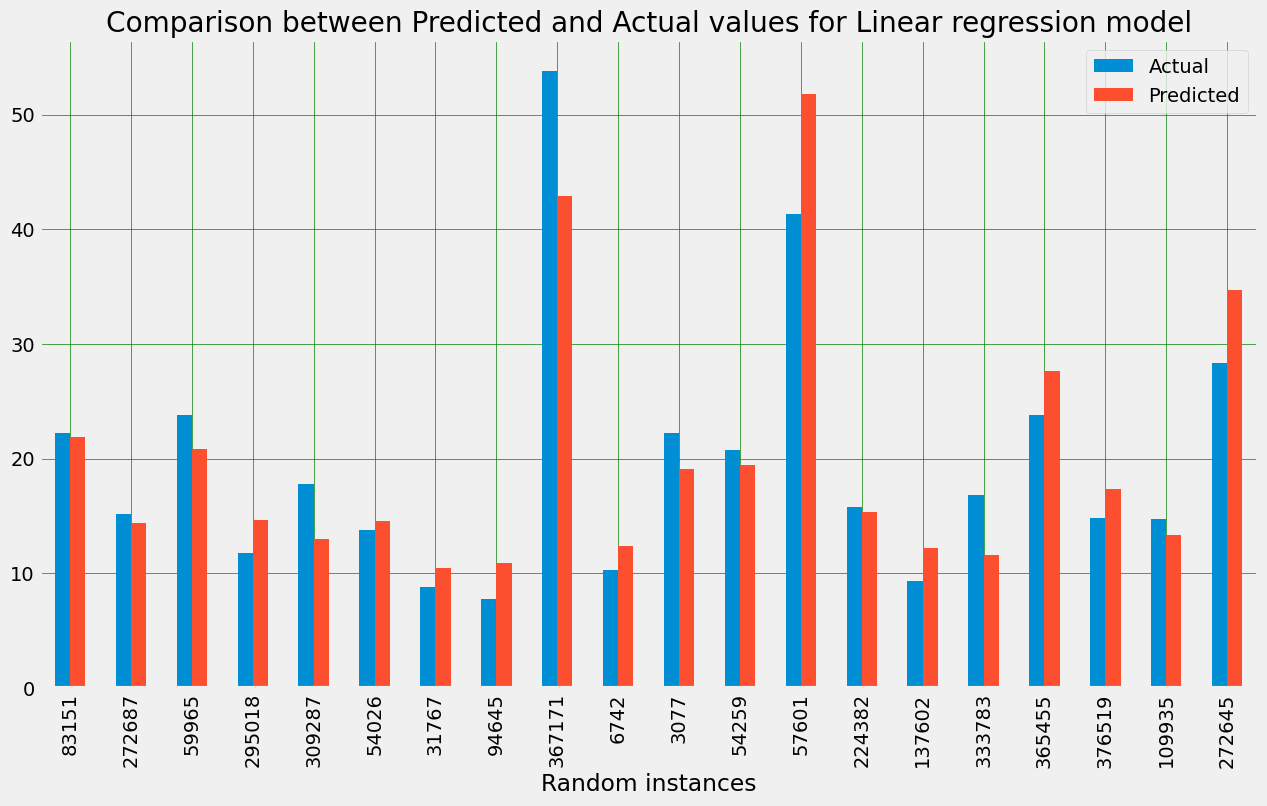

In [43]:
#Plotting Actuall vs Predicted Values

predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for Linear regression model")
plt.show()

In [44]:
#Getting The R Squared Value

lm_score = (r2_score(y_test, lm_regression_trips))*100
print(lm_score)

86.01854803182789


In [45]:
# Running the Decision Tree Regressor

start_time = time.time()
dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(x_train, y_train)
end_time = time.time()
dt_time = (end_time - start_time)
print(f"Time taken to train Decision tree model : {dt_time} seconds")

Time taken to train Decision tree model : 12.786581993103027 seconds


In [46]:
dt_regression_trips = dt_regression.predict(x_test)

In [47]:
# Generating prediction for Decission Tree Regressor model

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': dt_regression_trips.flatten()})
predictions.head(10)

,Actual,Predicted
0,12.98,13.560
1,8.80,7.880
2,19.56,20.875
3,20.16,21.620
4,15.36,16.560
5,11.16,12.400
6,78.80,80.300
7,20.38,15.360
8,20.80,35.560
9,10.80,11.800


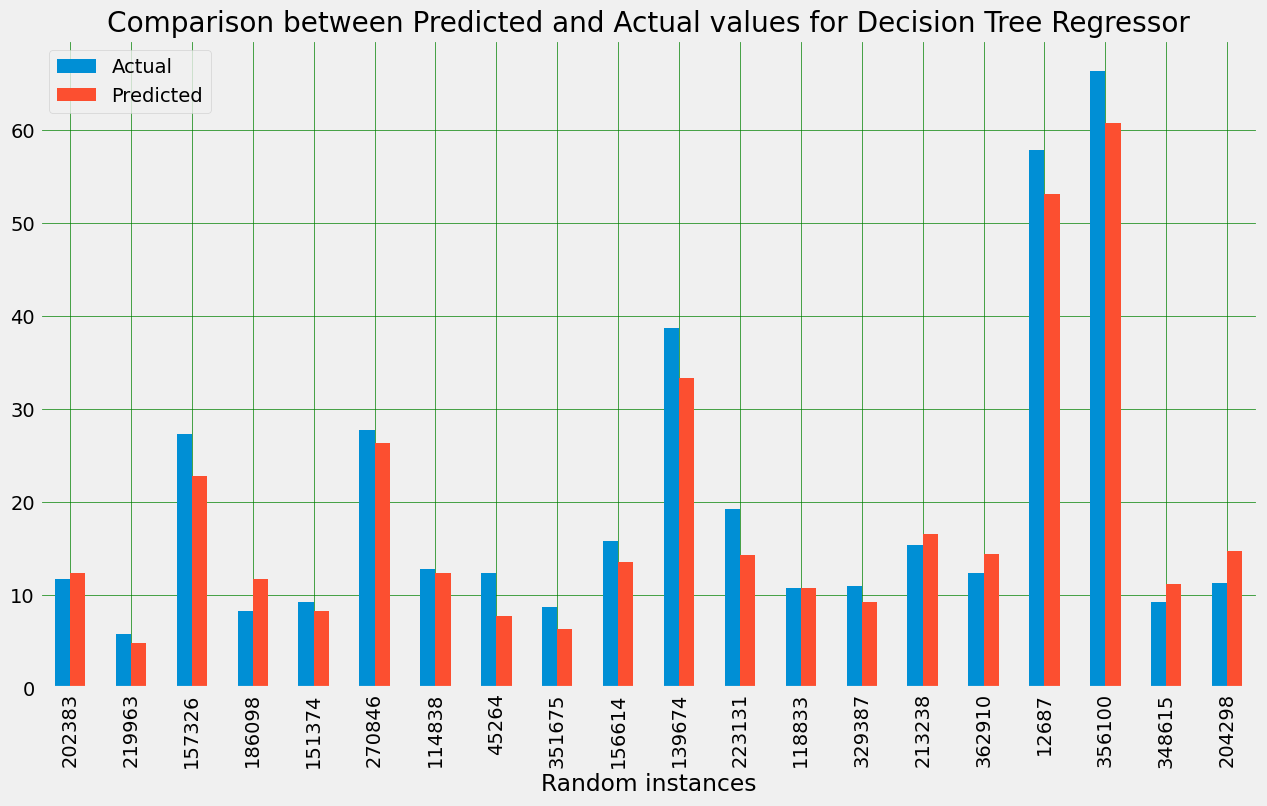

In [48]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for Decision Tree Regressor")
plt.show()

In [49]:
#Getting The R Squared Value

dt_score = (r2_score(y_test, dt_regression_trips))*100
print(dt_score)

75.629076034473


In [50]:
# Running The AdaBoostRegressor model

start_time = time.time()
ada_regression = AdaBoostRegressor()
ada_regression = ada_regression.fit(x_train, y_train)
end_time = time.time()
ad_time = (end_time - start_time)
print(f"Time taken to train AdaBoost model : {ad_time} seconds")

Time taken to train AdaBoost model : 40.26447010040283 seconds


In [51]:
ada_trips = ada_regression.predict(x_test)

In [52]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': ada_trips.flatten()})
predictions.head(10)

,Actual,Predicted
0,12.98,15.530093
1,8.80,14.714609
2,19.56,24.799150
3,20.16,24.799150
4,15.36,14.714609
5,11.16,14.714609
6,78.80,161.875486
7,20.38,15.530093
8,20.80,24.799150
9,10.80,15.587908


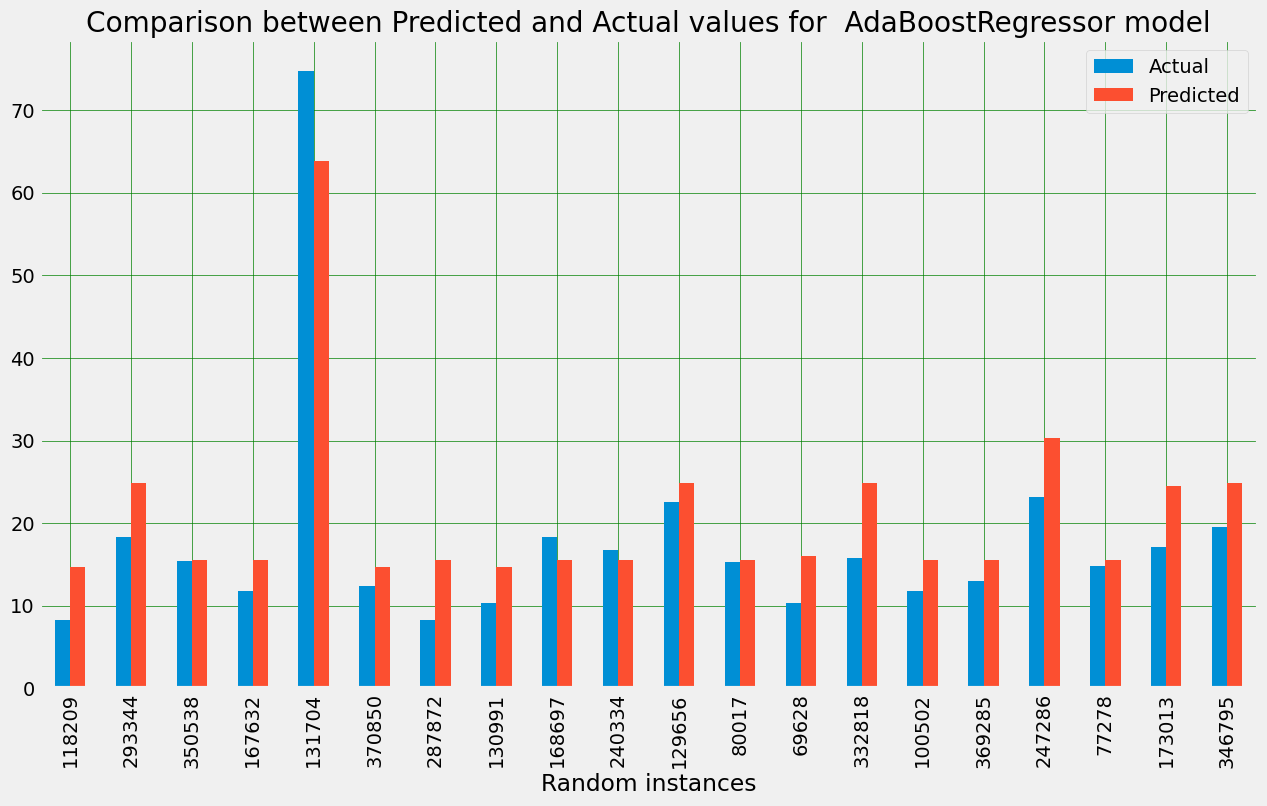

In [53]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for  AdaBoostRegressor model")
plt.show()

In [54]:
#Getting The R Squared Value

ad_score = (r2_score(y_test, ada_trips))*100
print(ad_score)

72.82598670840305


In [55]:
# Running The GradientBoostRegressor model

start_time = time.time()
gd_regression = GradientBoostingRegressor()
gd_regression = gd_regression.fit(x_train, y_train)
end_time = time.time()
gd_time = (end_time - start_time)
print(f"Time taken to train Gradient Boost model : {gd_time} seconds")

Time taken to train Gradient Boost model : 164.67650270462036 seconds


In [56]:
gd_trips = gd_regression.predict(x_test)

In [57]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': gd_trips.flatten()})
predictions.head(10)

,Actual,Predicted
0,12.98,15.003426
1,8.80,8.902401
2,19.56,19.341053
3,20.16,17.640344
4,15.36,12.036859
5,11.16,12.411021
6,78.80,76.989782
7,20.38,15.996742
8,20.80,23.791236
9,10.80,13.602491


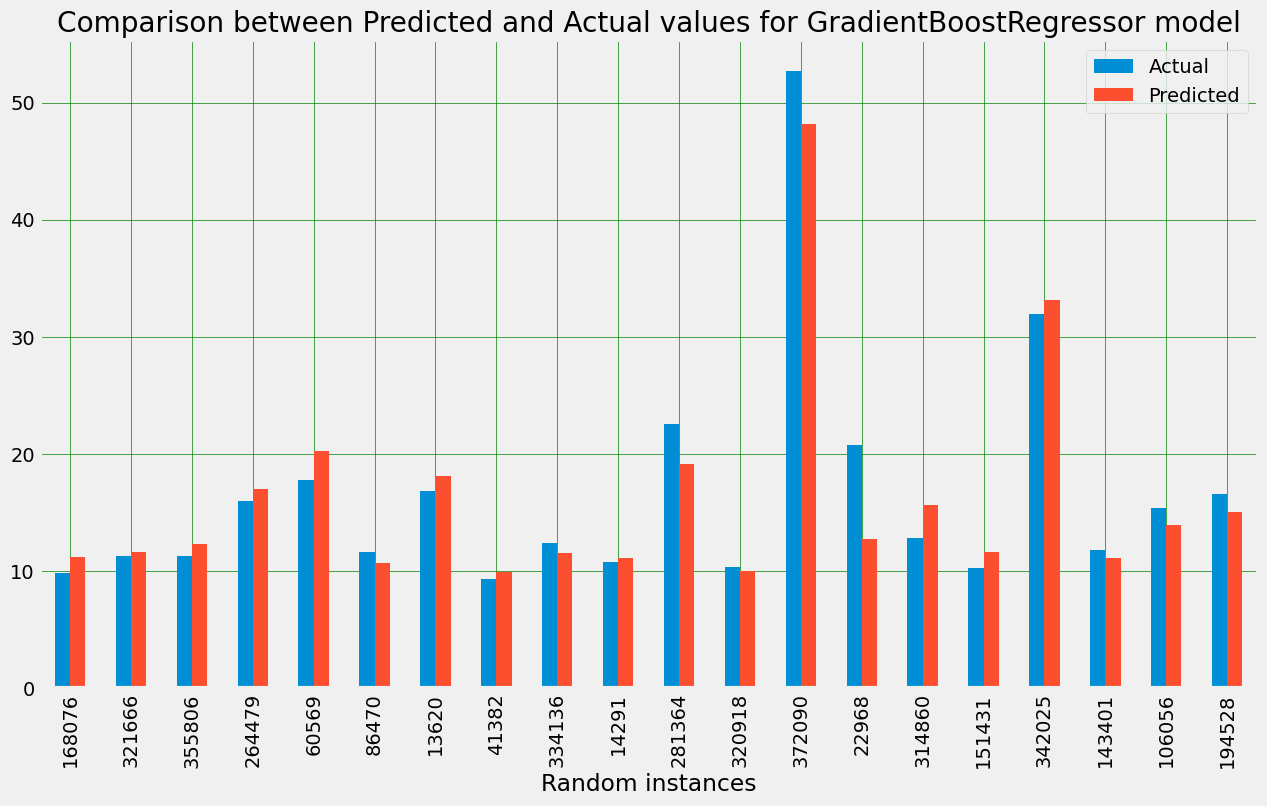

In [58]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for GradientBoostRegressor model")
plt.show()

In [59]:
#Getting The R Squared Value

gd_score = (r2_score(y_test, gd_trips))*100
print(gd_score)

89.00490166801501


In [60]:
# Running The XGBRegressor model

start_time = time.time()
xgb_regression = XGBRegressor(objective ='reg:squarederror')
xgb_regression = xgb_regression.fit(x_train, y_train)
end_time = time.time()
xgb_time = (end_time - start_time)
print(f"Time taken to train XGBoost  model : {xgb_time} seconds")

Time taken to train XGBoost  model : 8.217349529266357 seconds


In [61]:
XGB_trips = xgb_regression.predict(x_test)

In [62]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': XGB_trips.flatten()})
predictions.head(10)

,Actual,Predicted
0,12.98,14.461666
1,8.80,8.700172
2,19.56,20.018204
3,20.16,18.761181
4,15.36,12.297729
5,11.16,12.407703
6,78.80,78.045105
7,20.38,16.642729
8,20.80,24.934177
9,10.80,12.588114


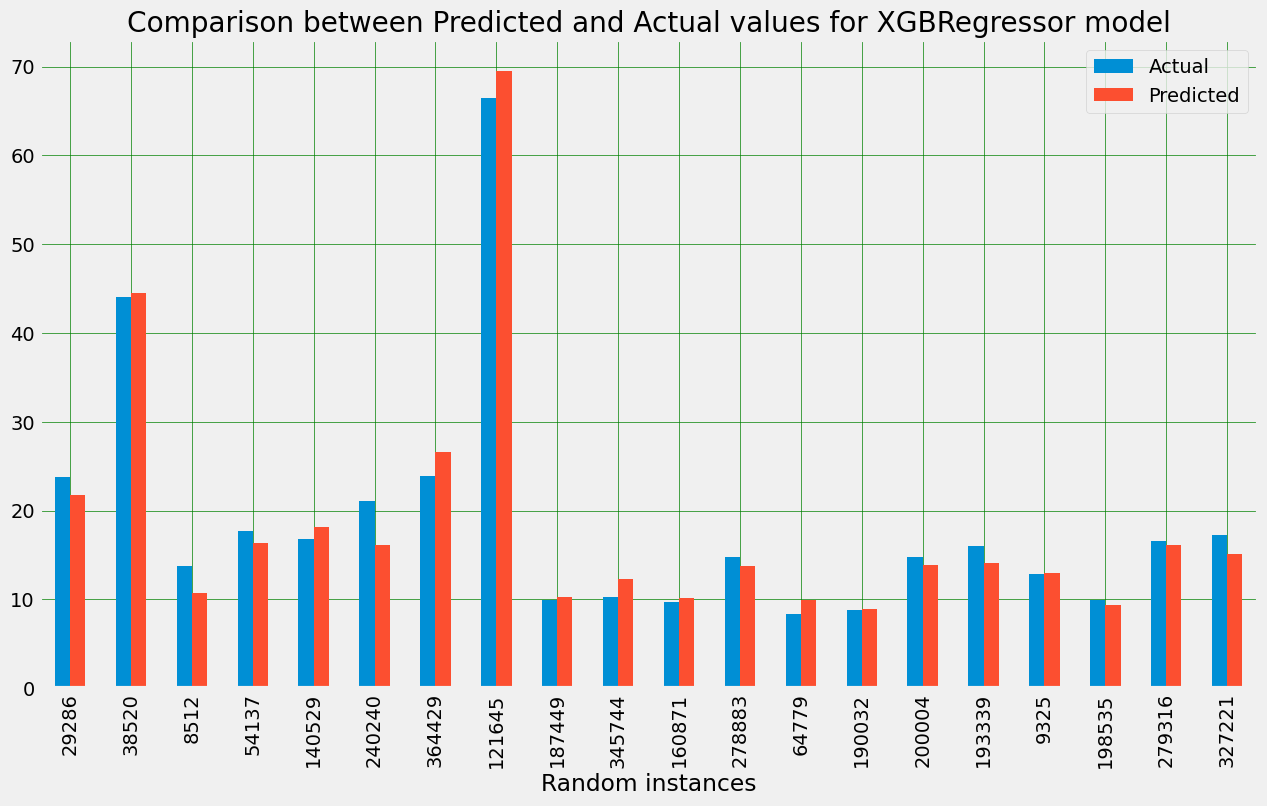

In [63]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Random instances")
plt.title("Comparison between Predicted and Actual values for XGBRegressor model")
plt.show()

In [64]:
#Getting The R Squared Value

xgb_score = ((r2_score(y_test, XGB_trips))*100)
print(xgb_score)

90.68964362039394


In [65]:
# Creating Accuracy and Time Dataframe

#r2 = [lm_score, dt_score, ad_score, gd_score, xgb_score]
#tm = [lm_time, dt_time, ad_time, gd_time, xgb_time]
#comp = pd.DataFrame({'Time': tm, 'Accu': r2})

r2 = [lm_score, dt_score, ad_score,gd_score, xgb_score]
tm = [lm_time, dt_time, ad_time, gd_time, xgb_time]
comp = pd.DataFrame({'Time': tm, 'Accu': r2})

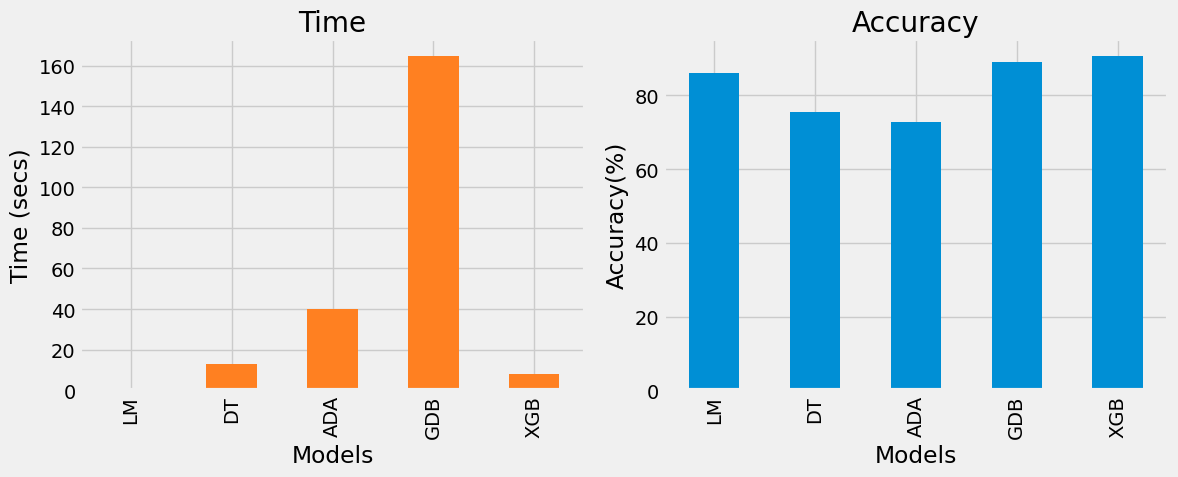

In [66]:
# Comparing All models based on time taken to implement and Accuracy

label = ['LM', 'DT', 'ADA','GDB', 'XGB']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = comp['Time'].plot(kind='bar',title="Time",ax=axes[0],color = (1, 0.5, 0.13))
ax1 = comp['Accu'].plot(kind='bar',title="Accuracy",ax=axes[1])
ax.set_ylabel("Time (secs)")
ax.set_xlabel('Models')
ax.set_xticklabels(label)
ax1.set_ylabel("Accuracy(%)")
ax1.set_xlabel('Models')
ax1.set_xticklabels(label)
fig.tight_layout()

In [67]:
######Prediction Test##############


Distance = 2.9959013761935176
PULocation_tag = 'Broad Channel'
DOLocation_tag = 'Astoria'
WeekDay = 0
Hour = 7

geocoder = Nominatim(user_agent="YTFP")
PULocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == PULocation_tag,('LocationID','Borough')]
PULocationID = PULocation_df['LocationID'].iloc[0]
PUlocation_zone = PULocation_df['Borough'].iloc[0]
PULocation = f"{PULocation_tag},{PUlocation_zone}"
coordinates_PU = geocoder.geocode(PULocation)
lat1,long1 = (coordinates_PU.latitude),(coordinates_PU.longitude)
place1=(lat1,long1)

DOLocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == DOLocation_tag,('LocationID','Borough')]
DOLocationID = DOLocation_df['LocationID'].iloc[0]
DOlocation_zone = DOLocation_df['Borough'].iloc[0]
DOLocation = f"{DOLocation_tag},{DOlocation_zone}"
coordinates_DO = geocoder.geocode(DOLocation)
lat2,long2 = (coordinates_DO.latitude),(coordinates_DO.longitude)
place2=(lat2,long2)

Distance_new = distance.distance(place1,place2).miles

answer = xgb_regression.predict([[Distance_new,PULocationID,DOLocationID,WeekDay,Hour]])
predicted_fare = ["%.2f"% elem for elem in answer]

if PULocationID == 132:
    predictedfare = float(predicted_fare[0])
    fare= predictedfare + 1.25
    print(f'Your estimated fare is $',fare)
elif PULocationID == 138:
    predictedfare = float(predicted_fare[0])
    fare= predictedfare + 1.25
    print(f'Your estimated fare is $',fare)
else:
    print(f'Your estimated fare is $',predicted_fare[0])
    

Your estimated fare is $ 52.94


In [68]:
############################################# GUI for Fare Predictor #############################################

def predict():
    global Prediction_label
    global WeekDay
    global fare
    Prediction_label.pack_forget()
    PULocation_tag = PULocation_entry.get()
    DOLocation_tag = DOLocation_entry.get()
    WeekDay_name = value_inside.get()
    Hour = int(Time_entry.get())
    
    
    geocoder = Nominatim(user_agent="YTFP")
    PULocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == PULocation_tag,('LocationID','Borough')]
    PULocationID = PULocation_df['LocationID'].iloc[0]
    PUlocation_zone = PULocation_df['Borough'].iloc[0]
    PULocation = f"{PULocation_tag},{PUlocation_zone}"
    coordinates_PU = geocoder.geocode(PULocation)
    lat1,long1 = (coordinates_PU.latitude),(coordinates_PU.longitude)
    place1=(lat1,long1)
    
    DOLocation_df = taxi_zone_df.loc[taxi_zone_df.Zone == DOLocation_tag,('LocationID','Borough')]
    DOLocationID = DOLocation_df['LocationID'].iloc[0]
    DOlocation_zone = DOLocation_df['Borough'].iloc[0]
    DOLocation = f"{DOLocation_tag},{DOlocation_zone}"
    coordinates_DO = geocoder.geocode(DOLocation)
    lat2,long2 = (coordinates_DO.latitude),(coordinates_DO.longitude)
    place2=(lat2,long2)
    
    Distance = distance.distance(place1,place2).miles

    if WeekDay_name == 'Monday':
        WeeDay = 0
    elif WeekDay_name == 'Tuesday':
        WeekDay = 1
    elif WeekDay_name == 'Wednesday':
        WeekDay = 2
    elif WeekDay_name == 'Thursday':
        WeekDay = 3
    elif WeekDay_name == 'Friday':
        WeekDay = 4
    elif WeekDay_name == 'Saturday':
        WeekDay = 5
    else:
        WeekDay = 6
    
    xgb_regression = XGBRegressor(objective ='reg:squarederror')
    xgb_regression = xgb_regression.fit(x_train, y_train)
    answer = xgb_regression.predict([[Distance,PULocationID,DOLocationID,WeekDay,Hour]])
    predicted_fare = ["%.2f"% elem for elem in answer]

    if PULocationID == 132:
        predictedfare = float(predicted_fare[0])
        fare= predictedfare + 1.25
        Prediction_label = Label(window,text=(f'Your estimated fare is ${fare}'),bg='black',fg='yellow',font=("Arial",15,"bold"))
        Prediction_label.pack()
    elif PULocationID == 138:
        predictedfare = float(predicted_fare[0])
        fare= predictedfare + 1.25
        Prediction_label = Label(window,text=(f'Your estimated fare is ${fare}'),bg='black',fg='yellow',font=("Arial",15,"bold"))
        Prediction_label.pack()
    else:
        Prediction_label = Label(window,text=(f'Your estimated fare is ${predicted_fare[0]}'),bg='black',fg='yellow',font=("Arial",15,"bold"))
        Prediction_label.pack()



#Window 
window = tk.Tk()
window.title('Fare Predictor')
window.geometry("300x500")
window.minsize(350,400)
window.maxsize(600,650)
small_icon = tk.PhotoImage(file="taxi_small.png")
large_icon = tk.PhotoImage(file="taxi_big.png")
window.iconphoto(False, large_icon, small_icon)
window.configure(bg='black')

options_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
value_inside = tk.StringVar(window) 
value_inside.set("Monday")

Title_label = Label(text = 'YELLOW TAXI FAIR PREDICTION', bg = 'black',fg = 'yellow',font=("Arial",15,"bold"))
Title_label.pack(pady=20)

PULocation_lable = Label(window,text='PICK UP LOCATION',bg='black',fg='yellow',font=("Arial",15,"bold"))
PULocation_lable.pack()

PULocation_entry = Entry(window,width=15,font=("Arial",14),bg="gray",fg="white",borderwidth=3)
PULocation_entry.pack(pady=5)

DOLocation_lable = Label(window,text='DROP OFF LOCATION',bg='black',fg='yellow',font=("Arial",15,"bold"))
DOLocation_lable.pack()

DOLocation_entry = Entry(window,width=15,font=("Arial",14),bg="gray",fg="white",borderwidth=3)
DOLocation_entry.pack(pady=5)

Weekday_lable = Label(window,text='DAY OF THE WEEK',bg='black',fg='yellow',font=("Arial",15,"bold"))
Weekday_lable.pack()

Weekday_entry = OptionMenu(window, value_inside, *options_list) 
Weekday_entry.pack(pady=5)
Weekday_entry.configure(width=20,bg='gray',fg='white')

Time_lable = Label(window,text='TIME',bg='black',fg='yellow',font=("Arial",15,"bold"))
Time_lable.pack()

Time_entry = Entry(window,width=15,font=("Arial",14),bg="gray",fg="white",borderwidth=3)
Time_entry.pack(pady=5)

Predict_button = Button(window,text='PREDICT',width=15,font=("Arial",14),bg="yellow",fg="black",command=predict)
Predict_button.pack(pady=5)

Prediction_label = Label(window,bg='black',fg='yellow',font=("Arial",15,"bold"))
Prediction_label.pack()

window.mainloop()